# KNN for Classification

We can use K nearest neighbors for classification the same way we used KNN to approximate a function with continuous outputs.
Our goal for KNN with continuous outputs was to estimate $P(y|X)$. 
The goal of KNN for classification is the same. 
We wish to estimate $P(y|X)$ except our y data can only take to values, $0$ or $1$.

The mechanics needed to estimate $P(y|X)$ are also the same between KNN for continuous outputs and classification.
We need: a distance function in order to defined neighborhoods, and our estimate of $P(y|X)$ will be an average over the $y$ values in our neighborhood.


## Distance function

A distance function takes two vectors as input and outputs a non-negative real number.
Given two vectors $a$ and $b$, 
a valid distance function: 

(i) must produce non-negative outputs,
$$
d(a,b) \ge 0
$$

(ii) must equal zero when the same vector is input

$$
d(a,a) = 0
$$

and must be symmetric

$$
d(a,b) = d(b,a)
$$


## Neighborhood

A distance function in-hand, we can define a neighborhood.
A neighborhood around $x$ of radius $r$ is the set of points whose distance from $x$ is less than or equal to $r$

$$
    N_{r}(x) = \left\{ x_{i} | d(x,x_{i}) \le r \right\}
$$

For KNN, we are interested in the $K$ **nearest** neighbors.
Or the $K$ points $x_{i}$ that have the smallest distances from our target $x$.
In some sense, the K nearest neighbors defines a Neighborhood around $x$ with a finite $r$.

## Formula to estimate $P(y|X)$

Given $y$ data $y_{1},y_{2},\cdots,y_{n}$ and corresponding $x$ **vectors** of length $m$ $x_{1},x_{2},\cdots,x_{n}$ we can estimate $P(y|X)$ using a distance function and neighborhood.

$$
P(y=1|x) = \frac{1}{|N|} \sum_{x_{i} \in N_{r}(x)} y_{i}
$$

The $y$ values take only two values: $0$ or $1$.
The average over a set of binary $y$ values is equal to the percentage of "1"s.
The above formula looks at a neighborhood of $x,y$ pairs and estimates $P(y=1|x)$ as the percentage of $y_{i}$ that equal $1$.

## Example by hand

Suppose I collected a small set of data

|y | x1|x2|x3|
|---|----|---|---|
|1 | 0.25| 1.1 |1|
|0 | 0.85| 0.1 |3|
|1 | 1.25| -2.1|2|
|0 | 0.68| 0.3 |3|
|0 | 3.15| 0.4 |4|
|1 | -0.25| 0.1 |-5|

The goal is to approximate $P(y=1|x = [0,1,0])$ (remember, $x$ is a **vector**).
I'll pre-specify my distance function and radius. 

The distance function I want to use is
$$
    d(a,b) = \sum_{i} |a_{i}-b_{i}|
$$
with a K equal to $r=3$.
I want to find the **3** nearest neighbors to estimate $P(y=1|x=[0,1,0])$

To approximate $P(y=1|x=[0,1,0])$ I need to compute the distance between my $x$ training data and the vector $[0,1,0]$

|y | x1|x2|x3|distance from x| Top 3 closest|
|---|----|---|---|---|---|
|1 | 0.25| 1.1 |1| 1.35|yes|
|0 | 0.85| 0.1 |3| 4.75|yes|
|1 | 1.25| -2.1|2| 6.35|no|
|0 | 0.68| 0.3 |3| 4.38|yes|
|0 | 3.15| 0.4 |4| 7.75|no|
|1 | -0.25| 0.1 |-5| 6.15|no|

We see that this corresponds to a Neighborhood of radius $4.75$ around our vector $[0,1,0]$


Then my estimate of $P(y=1|x=[0,1,0])$ equals

$$
P(y=1|x=[0,1,0]) \approx \frac{1}{3} (1+0+0) = 1/3 = 0.33
$$

## Example code



In [43]:
library(ElemStatLearn)
require(class)

x <- mixture.example$x # example x data every x-vector has two entries.
y <- mixture.example$y # example y data [0 or 1]

d = cbind(x,y)
print(head(d))

                            y
[1,]  2.52609297  0.3210504 0
[2,]  0.36695447  0.0314621 0
[3,]  0.76821908  0.7174862 0
[4,]  0.69343568  0.7771940 0
[5,] -0.01983662  0.8672537 0
[6,]  2.19654493 -1.0230141 0


In [45]:
xTest <- mixture.example$xnew # example test x data. The test data also has 2 dimensions.
print(head(xTest))

    x1 x2
1 -2.6 -2
2 -2.5 -2
3 -2.4 -2
4 -2.3 -2
5 -2.2 -2
6 -2.1 -2


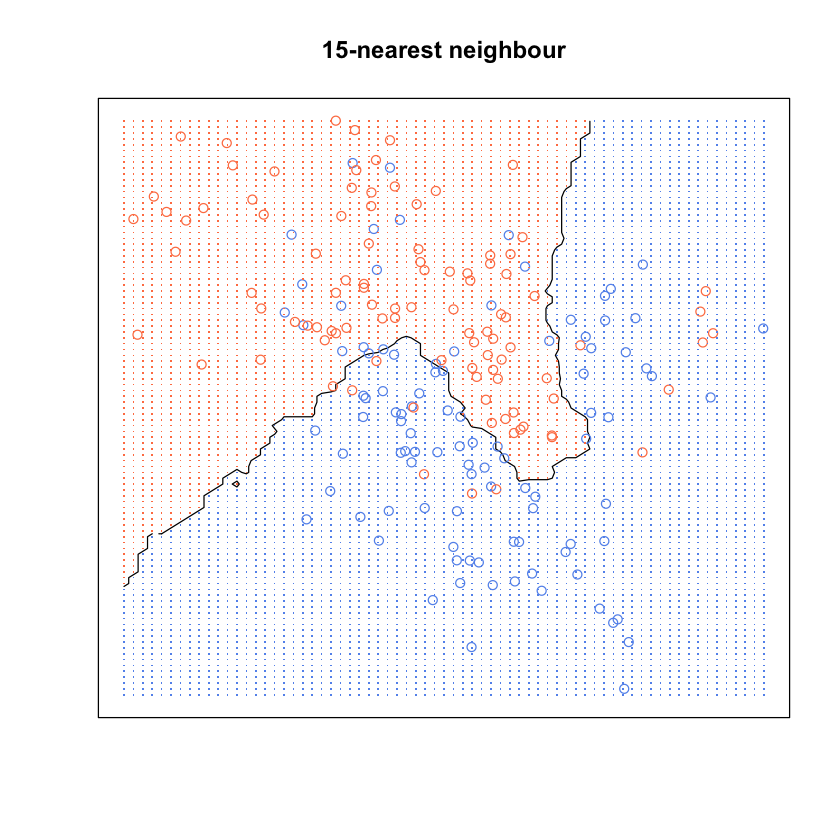

In [48]:
# The KNN function.
# This function takes the training X data, test X data, and training y data.
# Next, the KNN function requires you to specify a numnber of neighbors 
# and the prob=TRUE means we're using KNN for classifcation
oneAndZeroPredictionsOnTestSet <- knn(x, xTest, y, k=15, prob=TRUE)

#The below extracts the probabilites for each x test point
probOnTest <- attr(oneAndZeroPredictionsOnTestSet, "prob")

# This function builds a vector by evaluating the first argument. 
# If true, then set the vector value to probOnTest otherwise set to 1-probOnTest.  
probOnTest <- ifelse(oneAndZeroPredictionsOnTestSet=="1", probOnTest, 1-probOnTest)

# create a grid of x values
px1 = seq( min(x[,1]) -0.1 ,max(x[,1])+0.1,0.1)
px2 = seq( min(x[,2]) -0.05 ,max(x[,2]),0.05)

# create a grid of X1 by X2 and fill in the corresponding probabilities
prob15 <- matrix(probOnTest, length(px1), length(px2))

contour(px1, px2, prob15, levels=0.5, labels="", xlab="", ylab="", main=
        "15-nearest neighbour", axes=FALSE)
points(x, col=ifelse(g==1, "coral", "cornflowerblue"))
gd <- expand.grid(x=px1, y=px2)
points(gd, pch=".", cex=1.2, col=ifelse(prob15>0.5, "coral", "cornflowerblue"))
box()